# 2. Supervised Learning

### 2.3.8 신경망 (딥러닝)
- 다층 퍼셉트론

### 신경망 모델

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.model_selection import train_test_split

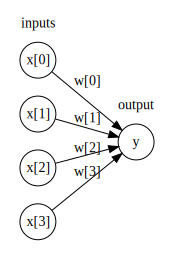

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

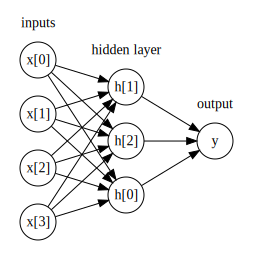

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

- 좀더 복잡하 신경망 모델

Text(0,0.5,'relu(x), tanh(x)')

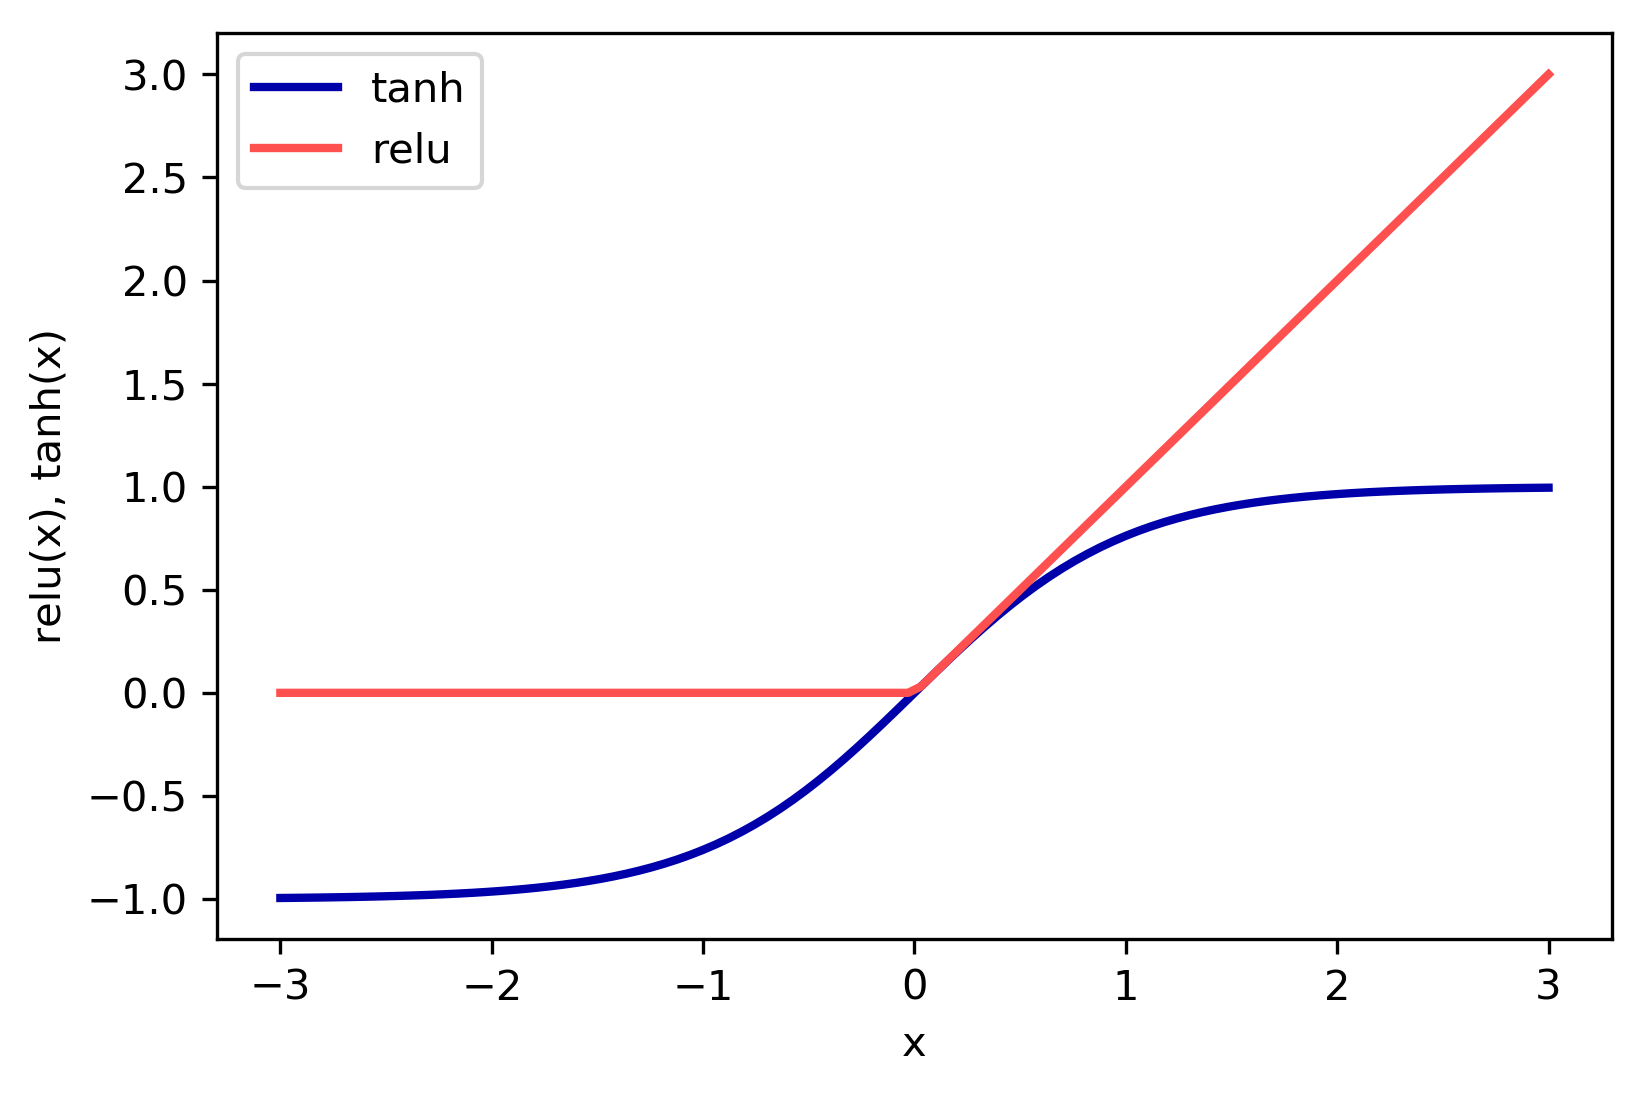

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

- 은닉틍이 두 개인 다층 퍼셉트론

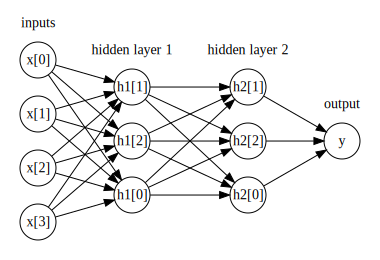

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

### 신경망 튜닝

Text(0,0.5,'feature 1')

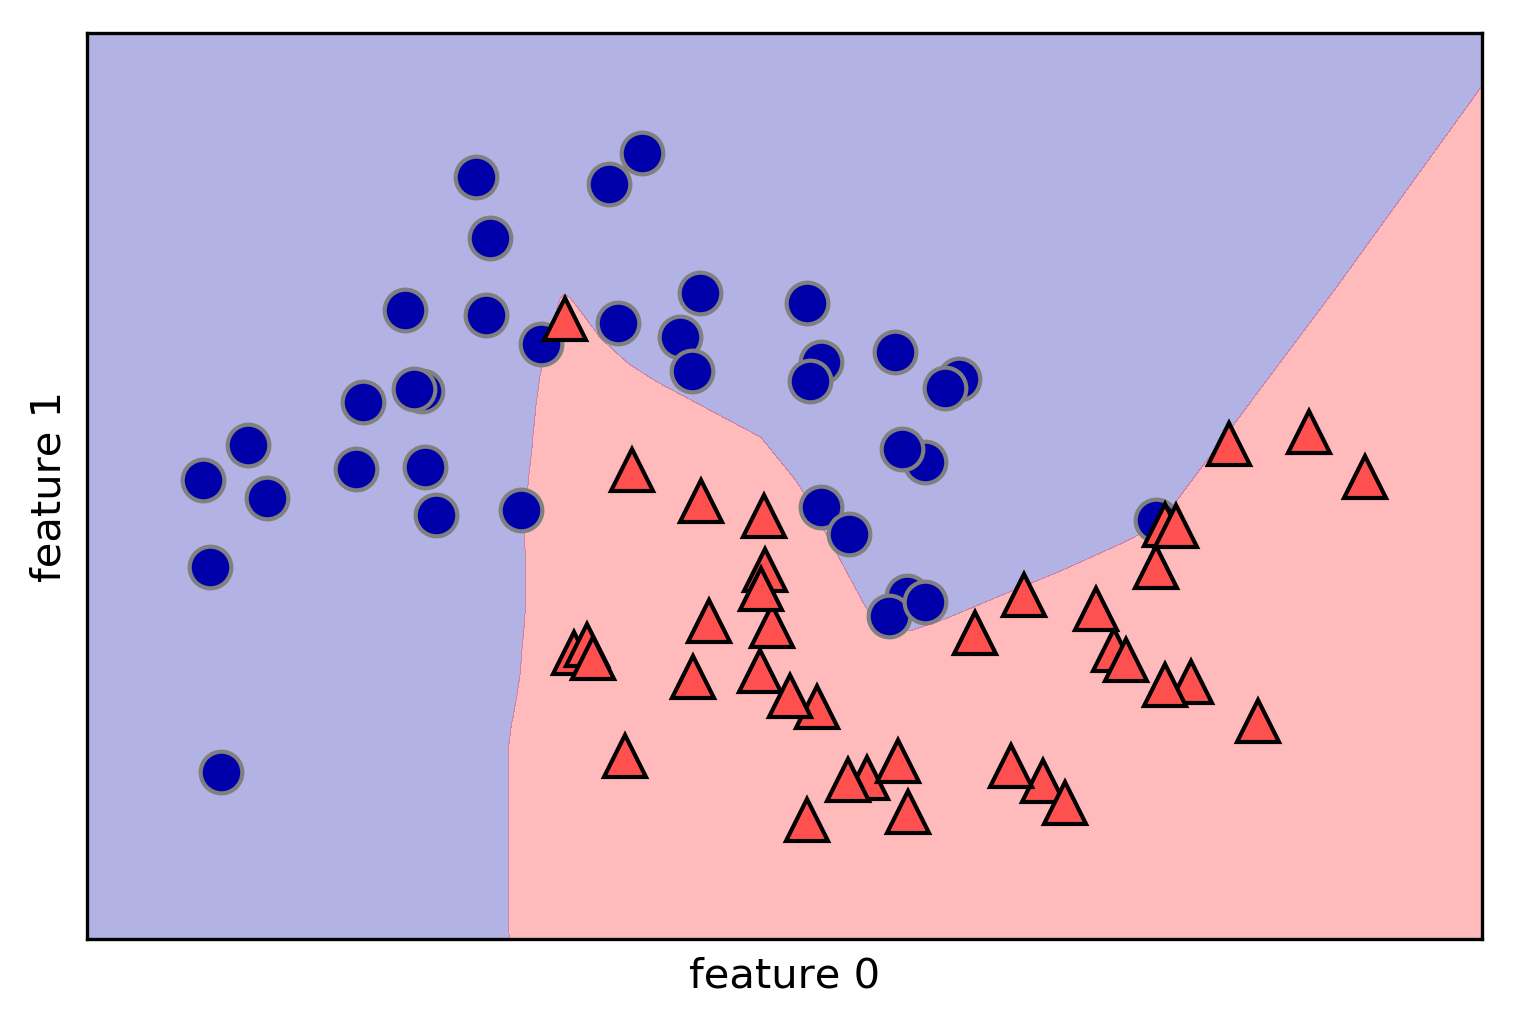

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0,0.5,'Feature 1')

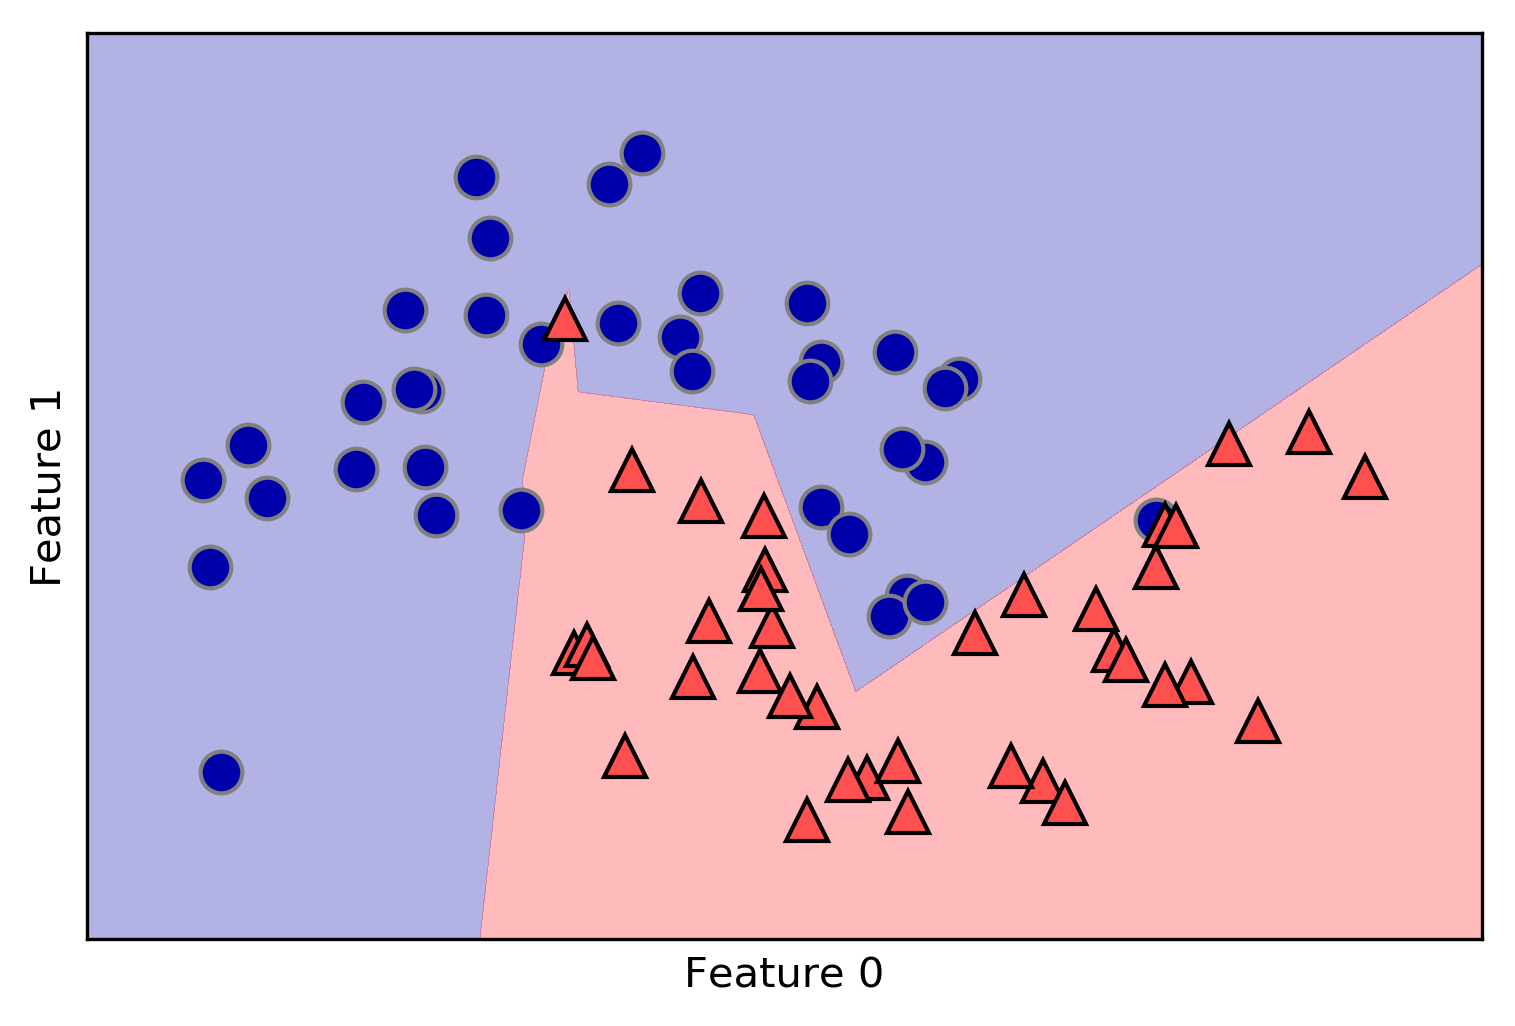

In [8]:
#10개의 유닛으로 된 두 개의 히든레이어
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

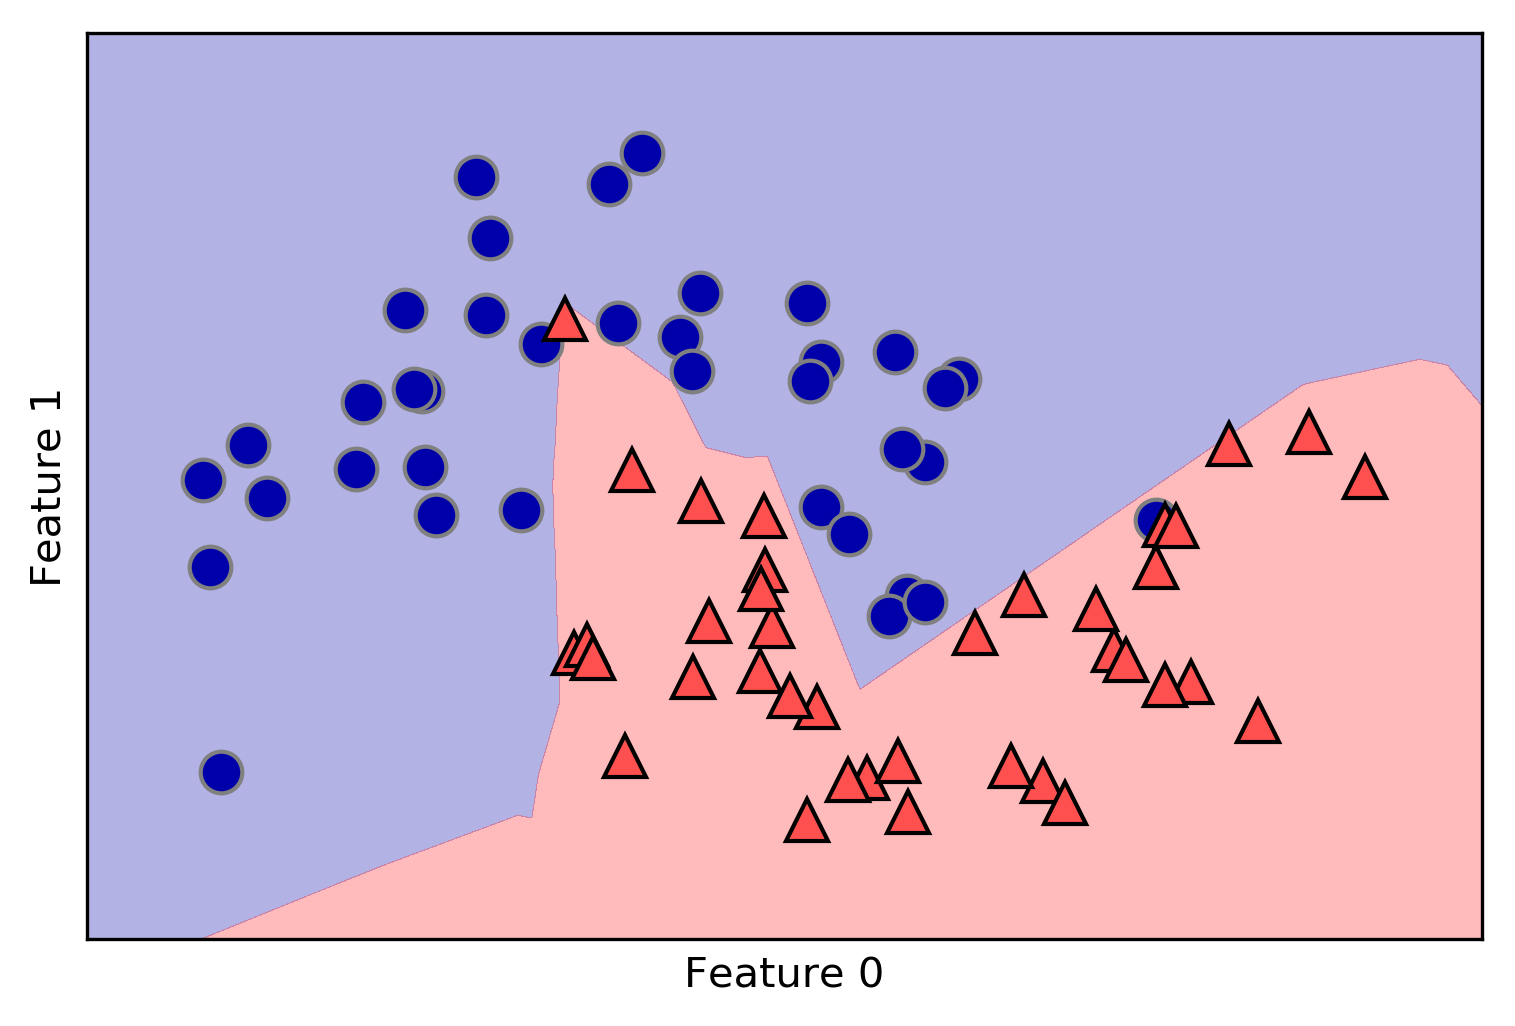

In [11]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

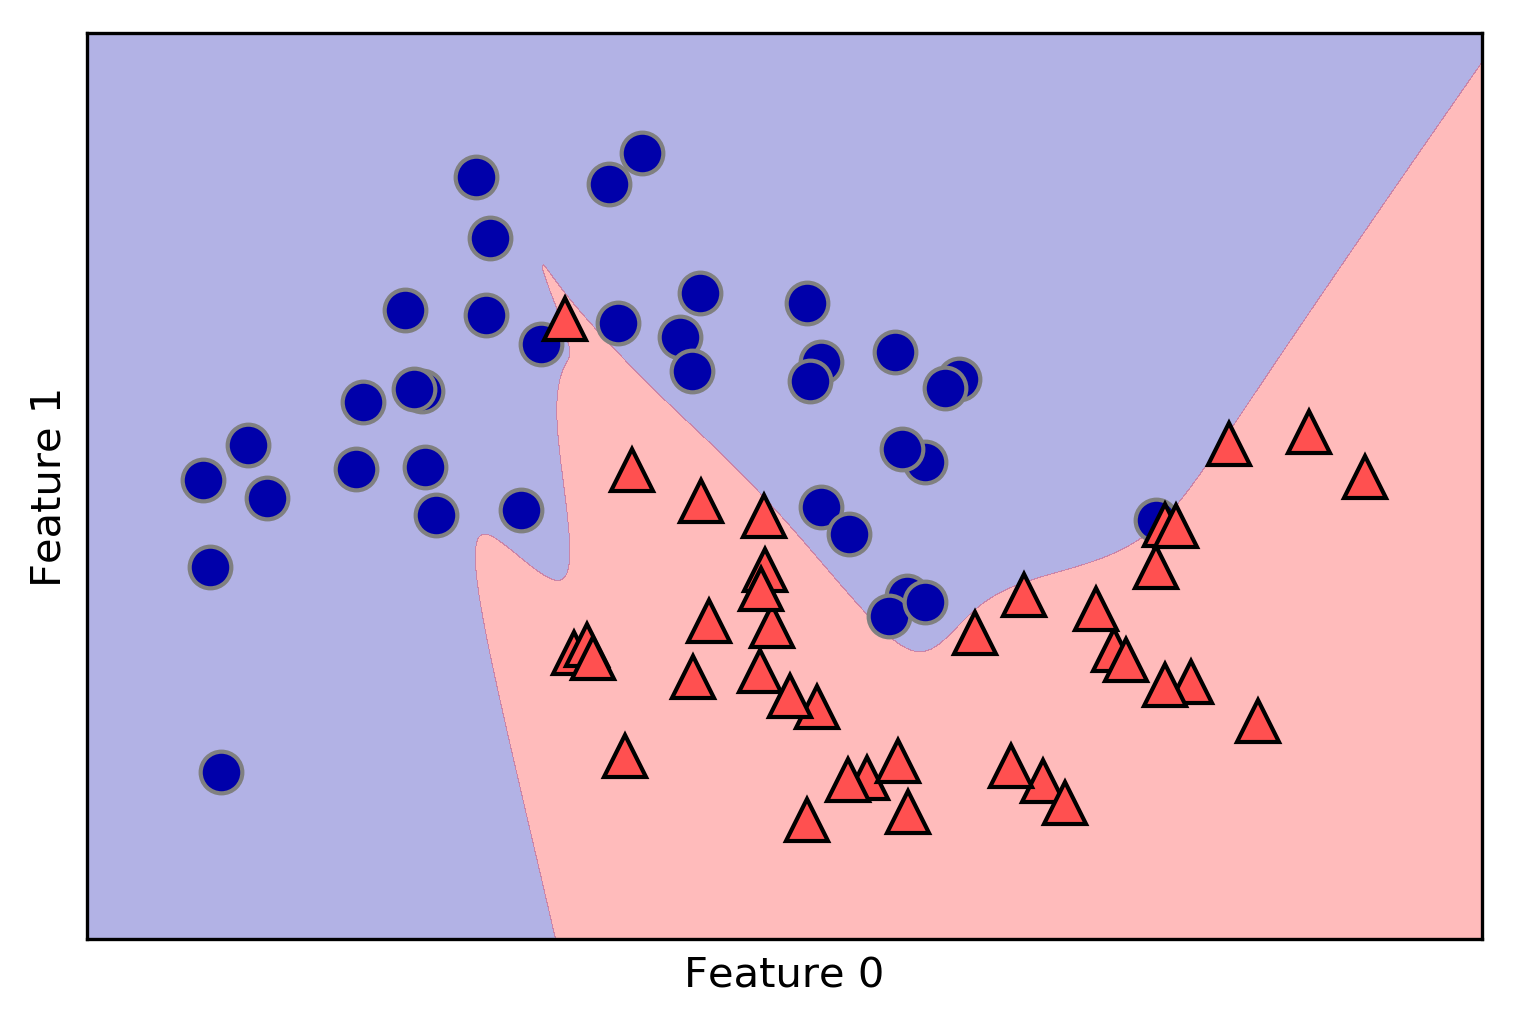

In [10]:
#tanh 활성화 함수가 적용된 경우
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- make_moons 데이터에 대해 은닉층 2개를 사용시 alpha 값이 미치는 영향

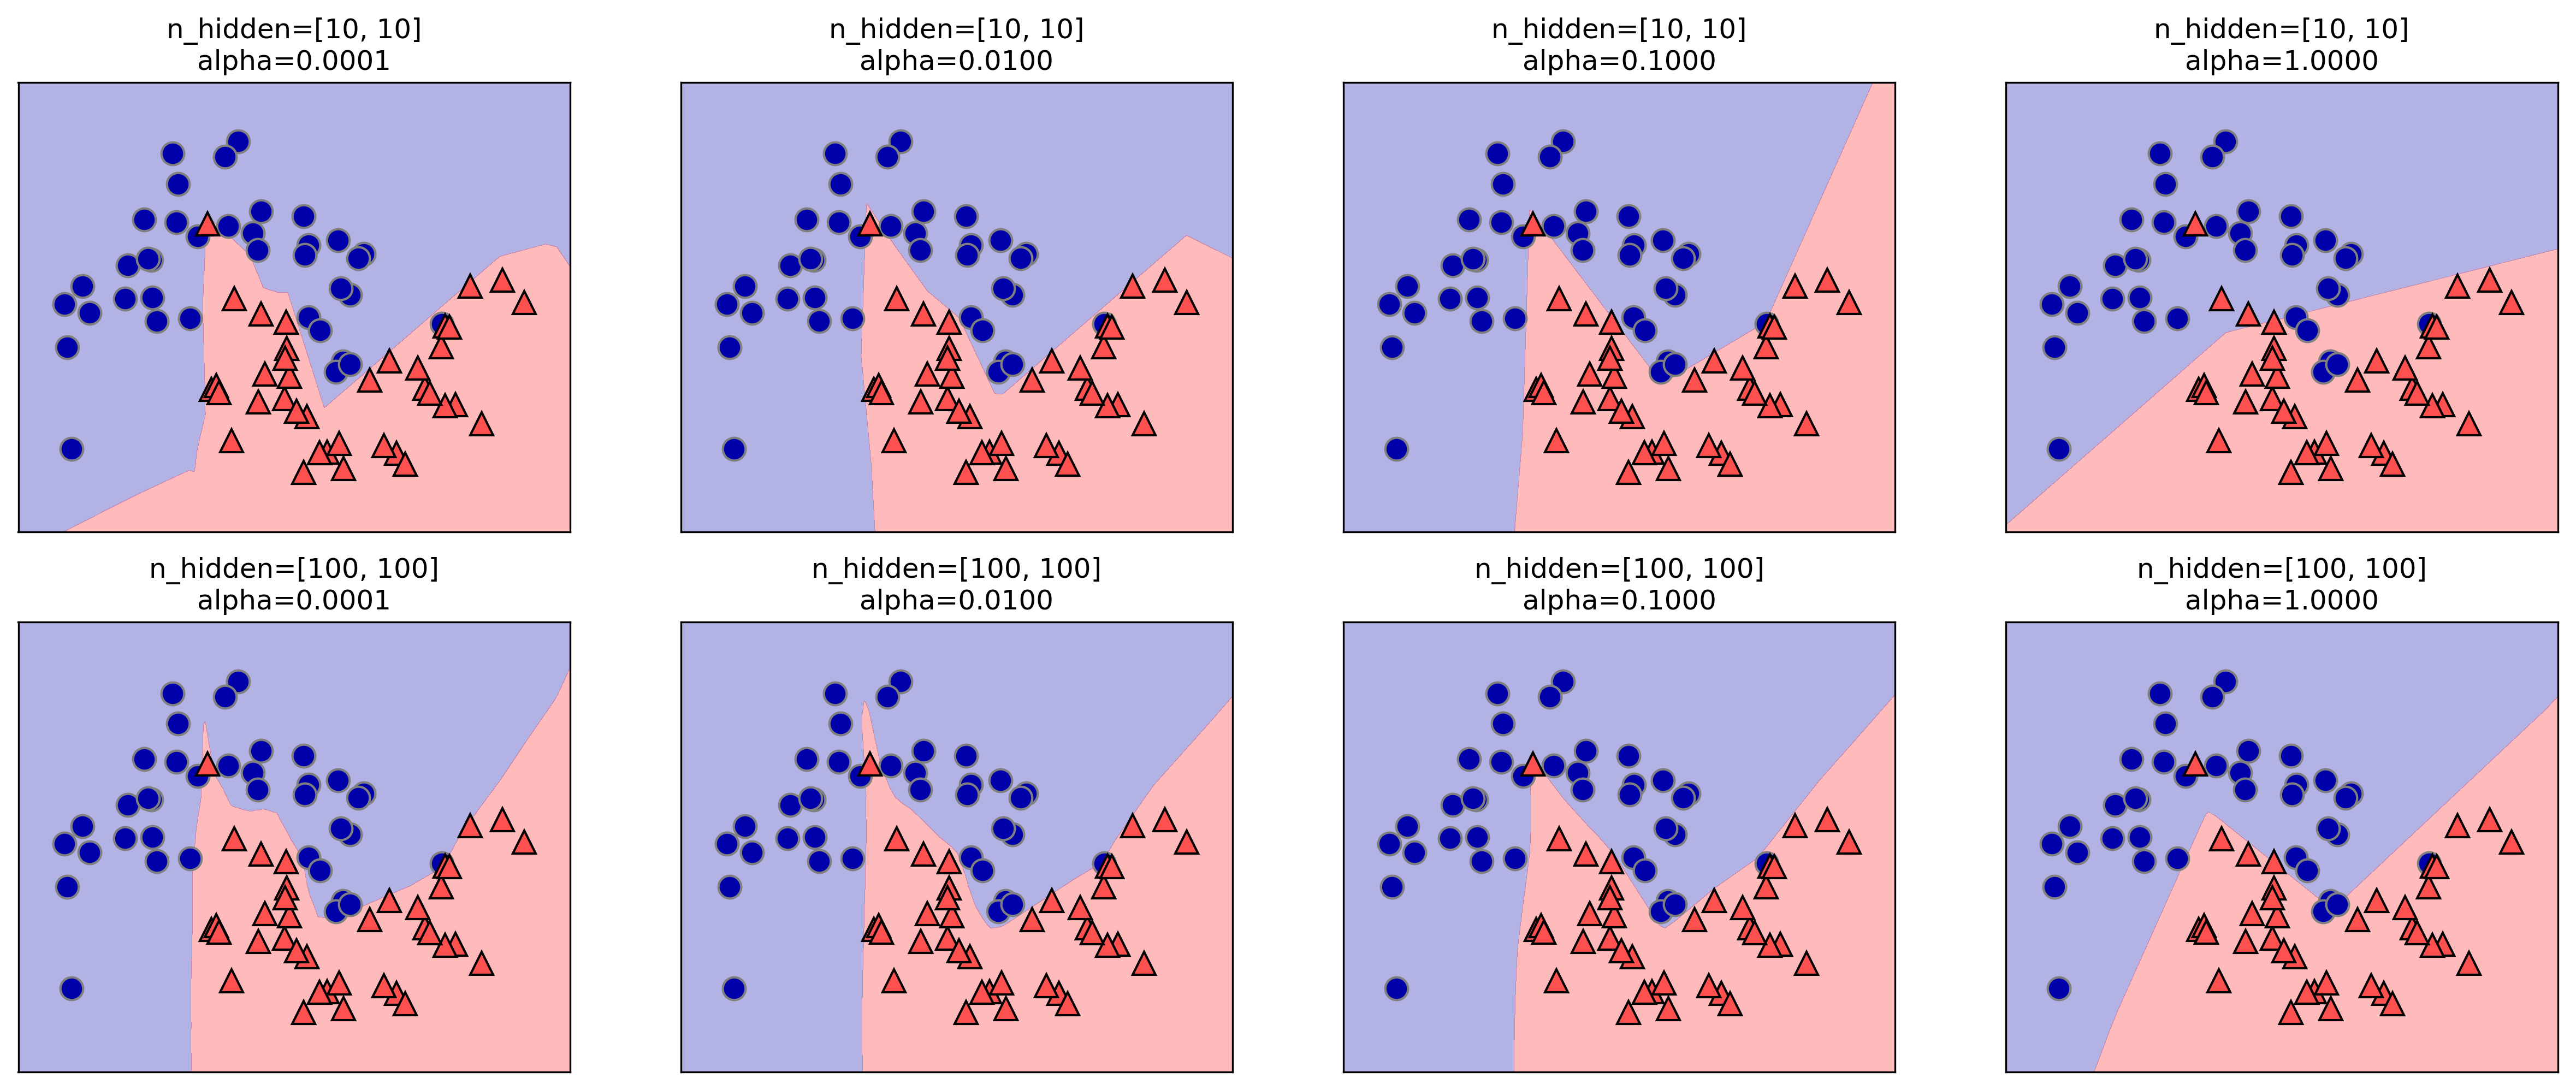

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

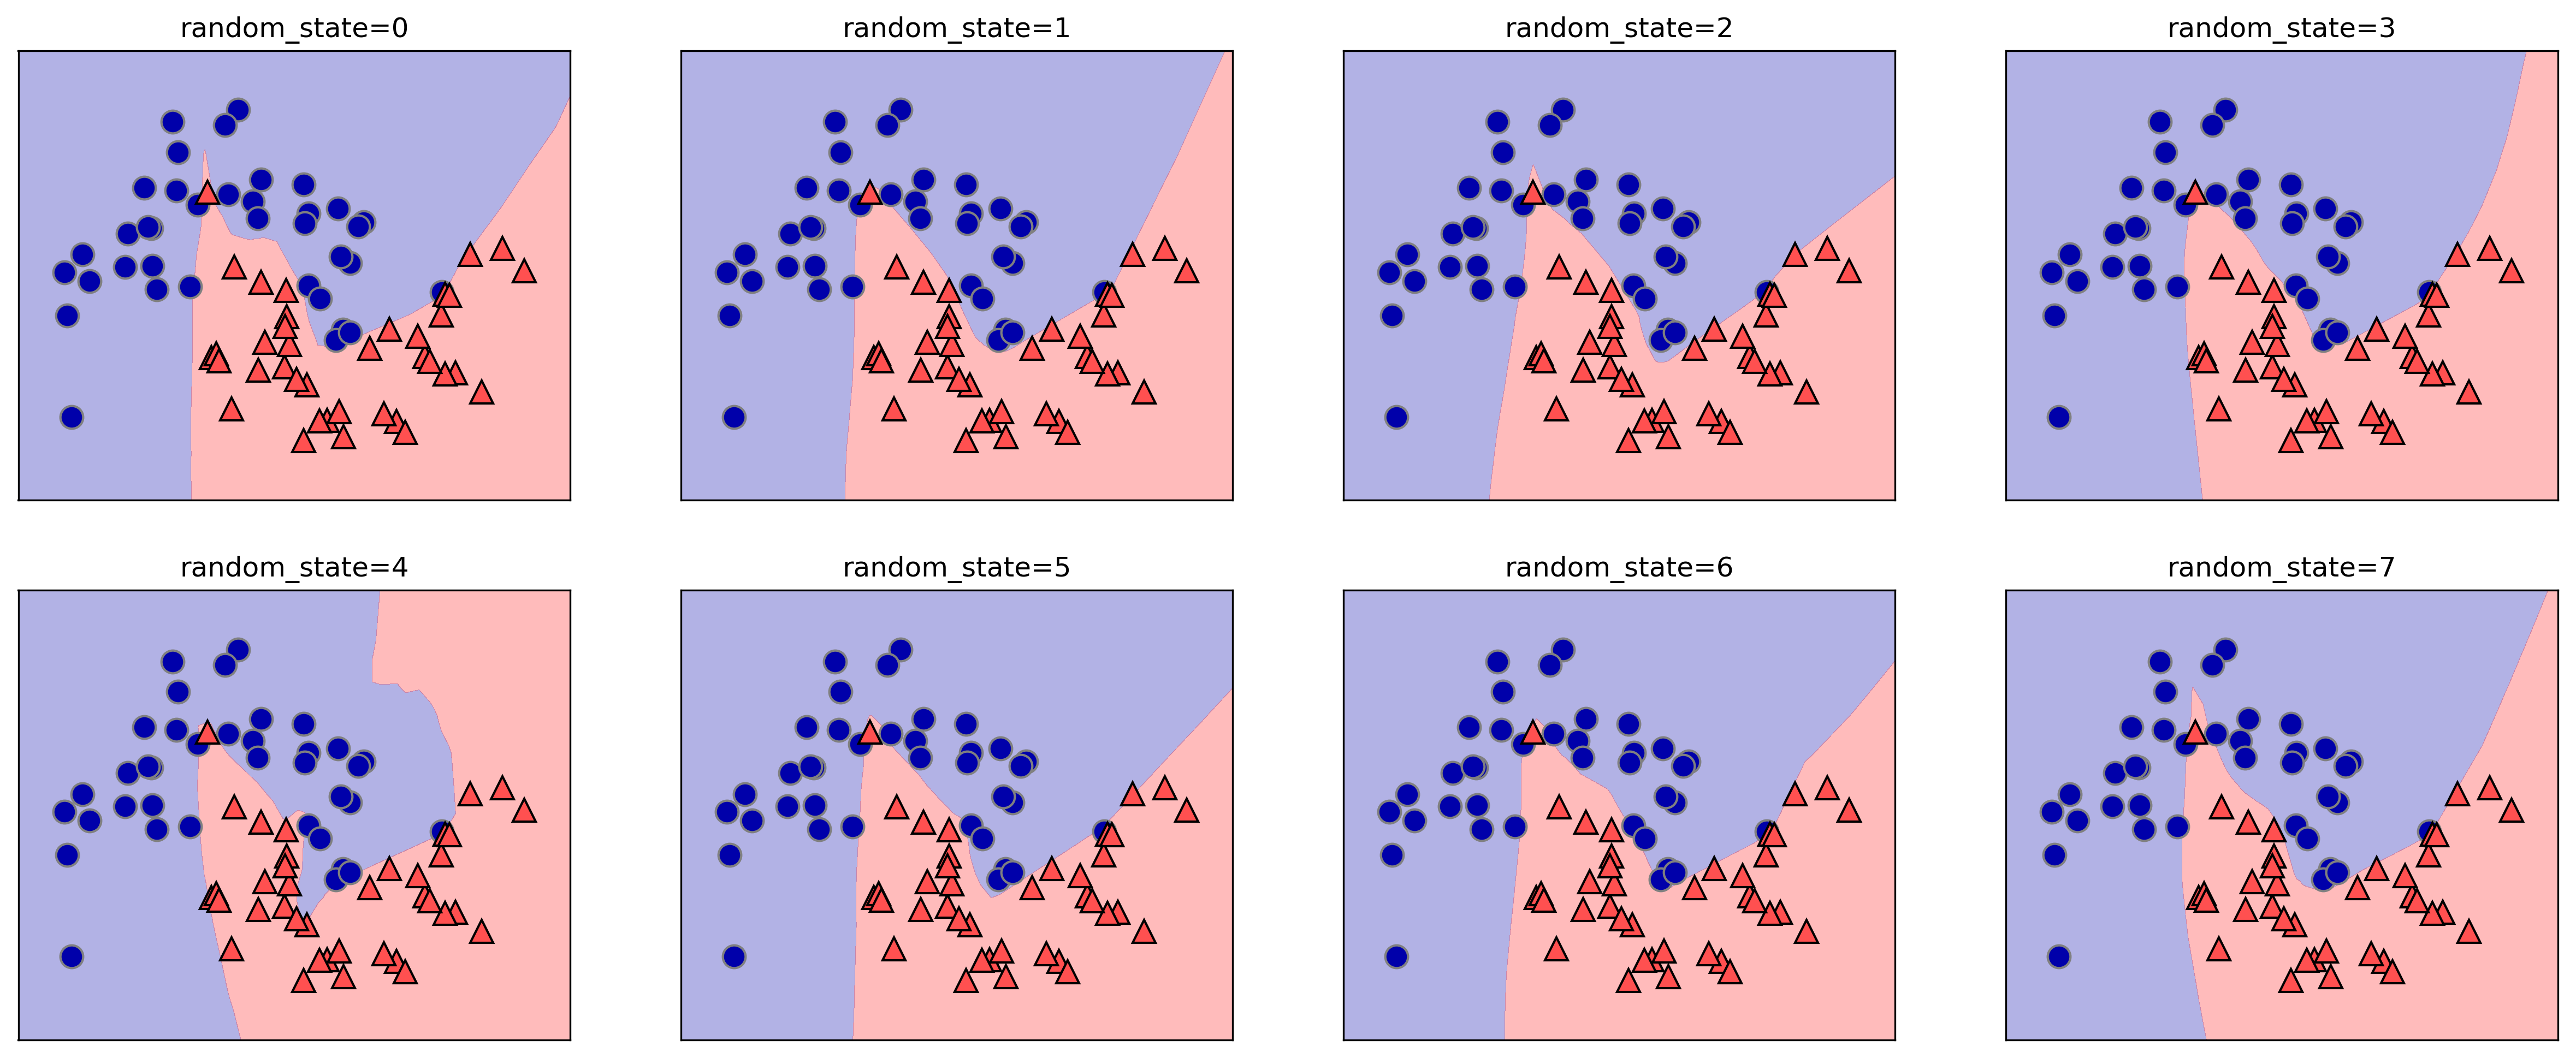

In [13]:
#같은 매개변수를 가졌지만 초기화를 다르게 한 경우
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("random_state={}".format(i))

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최댓값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최댓값:
[   28.11     39.28    188.5    2501.        0.163     0.345     0.427
     0.201     0.304     0.097     2.873     4.885    21.98    542.2
     0.031     0.135     0.396     0.053     0.079     0.03     36.04
    49.54    251.2    4254.        0.223     1.058     1.252     0.291
     0.664     0.207]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Train set Accuracy: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set Accuracy: {:.2f}".format(mlp.score(X_test, y_test)))

Train set Accuracy: 0.91
Test set Accuracy: 0.88


- MLP의 정확도는 높지만 SVC의 예제처럼 데이터의 변형이 필요

In [19]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

#데이터에서 평균을 빼고 표준편차로 나누어 평균 0, 편차 1인 데이터로 변환
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

#Adam 옵티마이저로 인한 경고 따라서 반복 횟수 증가
print("Train set Accuracy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set Accuracy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Train set Accuracy: 0.991
Test set Accuracy: 0.965


/Users/kyo/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [20]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Train set Accuracy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set Accuracy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Train set Accuracy: 0.993
Test set Accuracy: 0.972


In [23]:
#alpha 값을 증가
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Train set Accuracy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set Accuracy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Train set Accuracy: 0.988
Test set Accuracy: 0.972


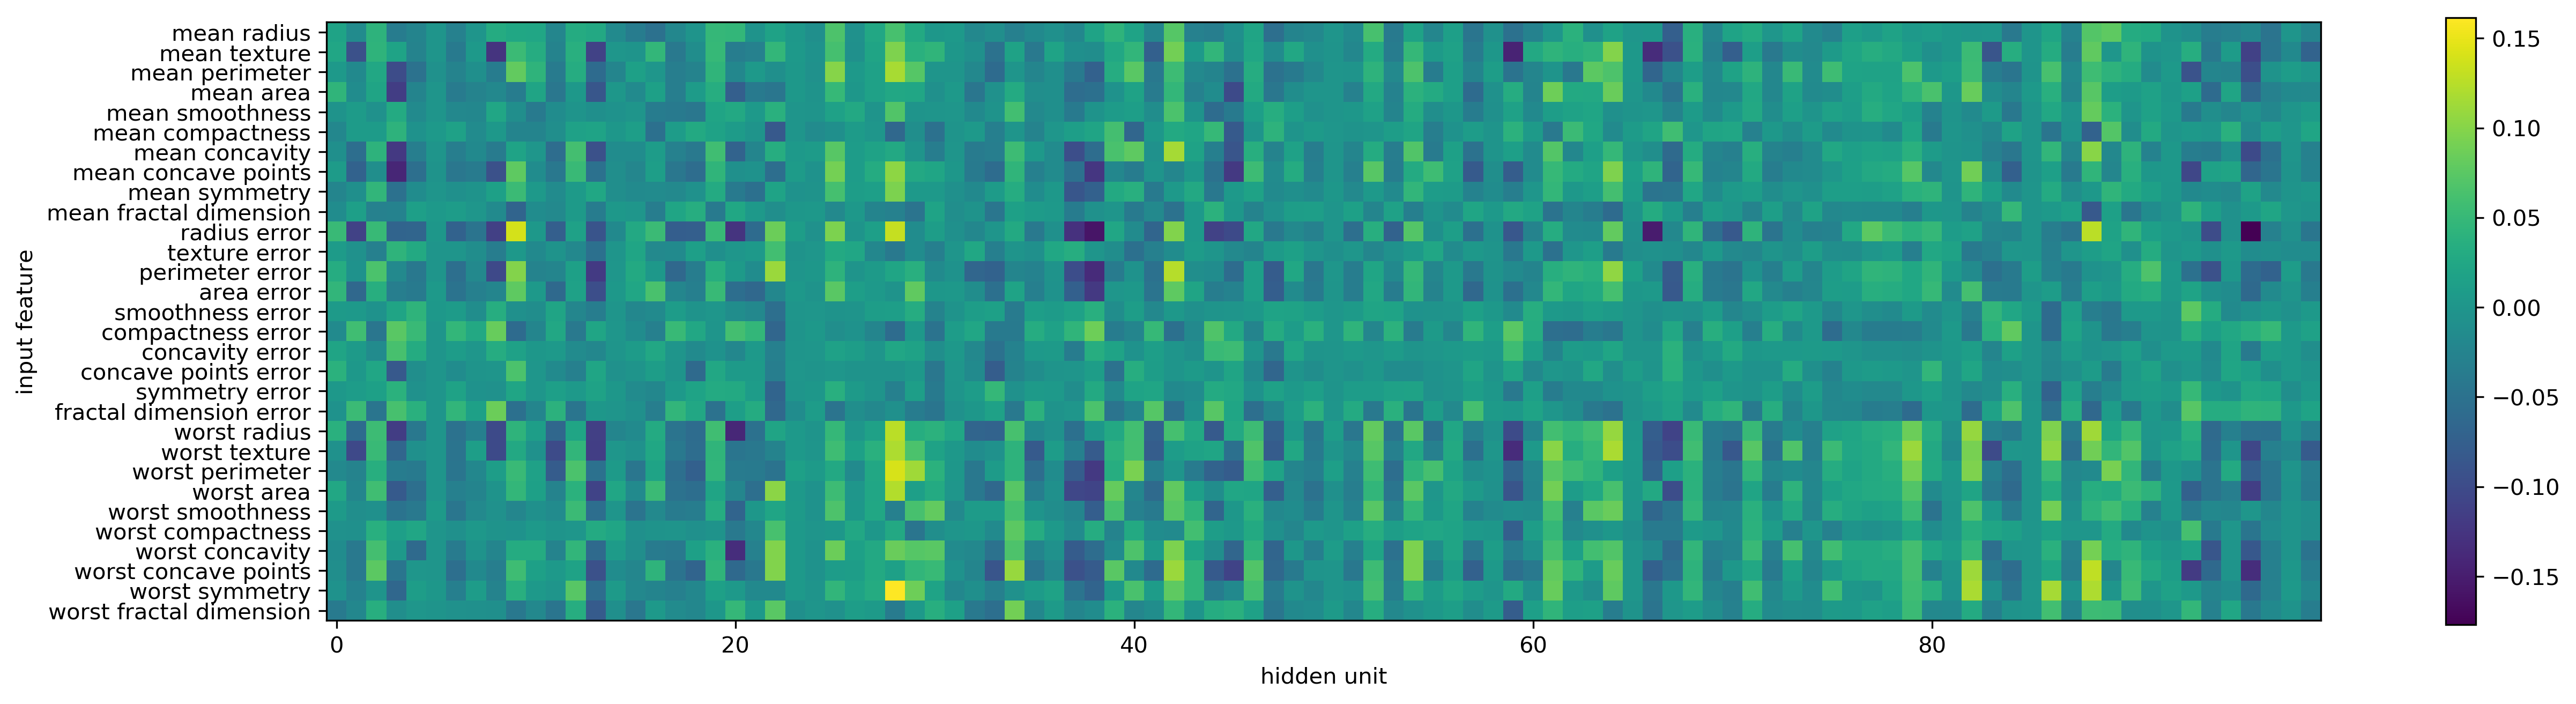

In [24]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden unit")
plt.ylabel("input feature")
plt.colorbar()

- smoothness error와 fractal dimension error 사이에 특성과 mean smoothness와 mean compactness 가 다른 특